# Sistema 1
## Colisiones de partículas

El paquete de programas __ESPResSO__ (Extensible Simulation Package for Research on Soft Matter Systems) está diseñado principalmente para la simulación de polielectrolitos con Molecular Dynamics (MD) a un nivel de descripción coarse-grained. Su principal enfoque es para polímeros, pero realmente sus aplicaciones pueden ser muchas y diversas dado que es un programa flexible y extendible a otros sistemas. Ha sido desarrollado en el Max Planck Institute for Polymer Research, Mainz y el Institute for Computational Physics de la University of Stuttgart dentro del grupo del Dr. Christian Holm. Para más información, podéis consultar en la página web oficial (https://espressomd.org/wordpress/).

Este programa proporciona una interfaz de comandos y funciones para configurar nuestro sistema de estudio, las condiciones de simulación, el análisis de distintas propiedades, cargar o guardar trayectorias, etcétera. Una de las grandes ventajas de trabajar con este programa es que permite introducir otros paquetes populares como SciPy, para el tratamiento de datos, o PyPlot, para graficar, entre muchos otros. A continuación configuraremos y analizaremos la trayectoria un caso sencillo de partículas sometidas a una interacción de Lennard-Jones con el programa ESPResSO.

Inicialmente cargamos el módulo <tt>espressomd</tt> en Python para obtener las funcionalidades de ESPResSO. En nuestro grupo de investigación, hemos diseñado un segundo módulo llamado <tt>tipus_particules</tt> para realizar varias funciones como, por ejemplo, asignar índices y parámetros a partículas determinadas, escribir las trayectorias incluyendo las Periodic Boundary Conditions (PBC), etc.

In [1]:
import espressomd
import numpy as np
import tipus_particules as tp

### Configuración del sistema
Inicializamos nuestro sistema de simulación mediante la clase System del módulo espressomd. Es importante tener en cuenta que sólo puede existir un único sistema en nuestro código.

Addicionalmente, definimos el tamaño de la caja del sistema con <tt>box_l</tt>. En este caso, la caja es definida como un cubo de 5x5x5 $nm^3$.

In [2]:
#Dimensiones del sistema:
system=espressomd.System(box_l=[5,5,5])   # Inicializamos el sistema. Caja de 5x5x5 nm3

### Definición y posición de las partículas
Las partículas del sistema y sus parámetros pueden definirse previamente antes de añadirlas en nuestra caja de simulación. Para este problema, definiremos dos tipos de partículas: <tt>type_A</tt> y <tt>type_P</tt> y les asignamos códigos numéricos para posteriormente definir el resto de parámetros (carga, masa, posición, coeficiente de difusión, etcétera, en caso que sea necesario). En este sistema únicamente necesitamos definir la carga y la masa de las partículas dentro de los diccionarios <tt>charges</tt> y <tt>mass</tt>.

In [3]:
#Partículas del sistema

#Código numérico de los tipos de partículas.
type_A = 0     
type_P = 1

#Parámetros de carga
charges = {}
charges[type_A] = 0
charges[type_P] = 0

#Parámetros de masa en kg/mol
mass = {}
mass[type_A] = 74.079e-3   # En kg/mol
mass[type_P] = 74.079e-3   # En kg/mol

A continuación añadimos las partículas en nuestro sistema con el comando <tt>system.part.add</tt>. Fíjate que les asignamos un <tt>id</tt> y las posiciones manualmente (<tt>pos</tt>). Utilizamos los diccionarios para definir el tipo, la carga y la masa de las partículas.

In [4]:
# Generamos tres partículas de tipo A

system.part.add(id=0,type=type_A, pos=[0.0,0.0,0],q=charges[type_A], mass=mass[type_A])
system.part.add(id=1,type=type_A, pos=[0.4,0.0,0],q=charges[type_A], mass=mass[type_A])
system.part.add(id=2,type=type_A, pos=[0.2,0.2,0],q=charges[type_A], mass=mass[type_A])

# Generamos una partícula de tipo P
system.part.add(id=3,type=type_P, pos=[0.1,3.0,0],q=charges[type_P], mass=mass[type_P])

Para acceder a los parámetros de una partícula, podemos utilizar el comando <tt>system.part</tt>. Si queremos acceder a los parámetros de la 2a partícula añadida, podemos realizar un <tt>print</tt> de <tt>system.part[1]</tt>. Por otro lado, si queremos conocer, por ejemplo, las cargas de todas las partículas del sistema, podemos realizar <tt>system.part[:].q</tt>.

In [5]:
# Propiedades de la partícula id=1
print(system.part[1])

ParticleHandle([('id', 1), ('pos', (0.4, 0.0, 0.0)), ('_id', 1), ('bonds', ()), ('dip', (0.0, 0.0, 0.0)), ('dipm', 0.0), ('director', (0.0, 0.0, 1.0)), ('exclusions', ()), ('ext_force', (0.0, 0.0, 0.0)), ('ext_torque', (0.0, 0.0, 0.0)), ('f', (0.0, 0.0, 0.0)), ('fix', (0, 0, 0)), ('gamma', (-1.0, -1.0, -1.0)), ('gamma_rot', (-1.0, -1.0, -1.0)), ('image_box', (0, 0, 0)), ('mass', 0.074079), ('mol_id', 0), ('node', 0), ('omega_body', (0.0, 0.0, 0.0)), ('omega_lab', (0.0, 0.0, 0.0)), ('q', 0.0), ('quat', (1.0, 0.0, 0.0, 0.0)), ('rinertia', (1.0, 1.0, 1.0)), ('rotation', (0, 0, 0)), ('swimming', {'v_swim': 0.0, 'f_swim': 0.0, 'mode': 'N/A', 'dipole_length': 0.0}), ('temp', -1.0), ('torque_lab', (0.0, 0.0, 0.0)), ('type', 0), ('v', (0.0, 0.0, 0.0)), ('virtual', False), ('vs_quat', array([0., 0., 0., 0.])), ('vs_relative', (0, 0.0, array([0., 0., 0., 0.])))])


In [6]:
# Listado de las cargas de todas las partículas del sistema
print(system.part[:].q)

[0. 0. 0. 0.]


Con el uso de <tt>system.part</tt> también nos permite modificar los parámetros de una partícula de nuestro sistema. A continuación le asignaremos una velocidad inicial a la partícula 3, la única partícula P de nuestro sistema de simulación, con <tt>system.part[3].v</tt>.

In [7]:
# Asignamos una Velocitat para la partícula P
system.part[3].v=[0,-100,0]  # vx=vz=0  vy=-100 nm/ns

### Definición de las interacciones
Las interacciones, así como las partículas, deben definirse previamente antes de iniciar la simulación. Existen muchos tipos de interacciones no-enlazantes (https://espressomd.github.io/doc/inter_non-bonded.html) o enlazantes (https://espressomd.github.io/doc/inter_bonded.html) para definir en nuestro sistema. En este caso trabajamos con un caso sencillo de partículas separadas sin carga y utilizaremos un potencial no-enlazante Lennard-Jones. En concreto, utilizamos el potencial Weeks-Chandler-Andersen (WCA). 

El potencial WCA es puramente repulsivo y se obtiene mediante la definición del cutoff en el mínimo del potencial y suavizándolo para que sea continuo hasta llegar al cutoff. Entonces, $r_{cut} = 2^{1/6} \sigma$ y $c_{shift} =$ <tt>auto</tt>. Cuando utilizamos potencial LJ, necesitamos definir la profunidad del pozo del potencial (o energía de dispersión) $\epsilon$ y el tamaño de partícula $\sigma$.

Fíjate que definimos las interacciones para cada conjunto de tipos de partícula. Es decir, se define la interacción WCA entre las partículas  <tt>type_A</tt> y <tt>type_A</tt> y también entre las partículas <tt>type_A</tt> y <tt>type_P</tt>. Si existieran más partículas <tt>type_P</tt>, haría falta definir la interacción entre ellas.

In [8]:
# Interacciones

epsi=1000.     # En J/mol 
diametro=0.2   # En nm
    
system.non_bonded_inter[type_A,type_A].wca.set_params(epsilon=epsi, sigma=diametro)
system.non_bonded_inter[type_A,type_P].wca.set_params(epsilon=epsi, sigma=diametro)

### Integración del sistema
Una vez definidas las partículas del sistema y sus interacciones, activamos y configuramos el integrador para la simulación de nuestro sistema. En este caso ejemplar, utilizamos el integrador Velocity Verlet con el comando <tt>system.integrator.set_vv()</tt> y definimos el tiempo de simulación realizado en cada step y el <tt>skin</tt> para construir la lista de vecinos de cada partícula durante la simulación.

Las variables <tt>niter</tt> y <tt>pasos</tt> servirán para definir cuantas iteraciones realizaremos en cada paso y el número de pasos de la simulación, respectivamente. Las posiciones de las partículas se guardarán en el archivo <tt>Trajectory1.xyz</tt> sin aplicar condiciones de PBC gracias al módulo de <tt>tipus_particles</tt> cargado inicialmente.

Más información sobre los integradores disponibles en:  https://espressomd.github.io/doc/running.html#integrators.

In [9]:
# Activamos el Modelo Velocity-Verlet
system.integrator.set_vv()

In [10]:
system.time_step =  0.0001       # Time-step en ns
system.cell_system.skin =  0.3  

niter=1         # Iteraciones de DM cada vez aue se invoque el system.integrator.run
                # En simulaciones reales niter es del order de 100, 1000, ...
pasos=500       # Número de repeticiones del integrador

tp.save_vxyz(system,'Trajectory1.xyz','w',aplicar_PBC=False)

coor=[]

for it in range(pasos):
    system.integrator.run(niter)                  # Realiza niter de dinámica
    tp.save_vxyz(system,'Trajectory1.xyz','a',aplicar_PBC=False)    # Save coordenada
    coor.append(system.part[3].pos)

Durante la simulación hemos guardado la posición de la partícula 3 (<tt>type_P</tt>) en la lista <tt>coor</tt> para graficar, a continuación, su posición en cada uno de los ejes de coordenadas durante el avance de la simulación. Observa el comportamiento de la partícula en el paso ~260. 

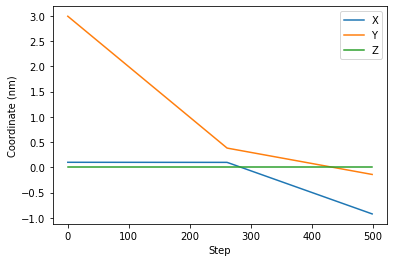

In [11]:
import matplotlib.pyplot as plt
coor=np.array(coor)

plt.ylabel('Coordinate (nm)')
plt.xlabel('Step')
plt.plot(coor)
plt.legend(["X","Y","Z"])

plt.show()

# Práctica

- Haz otras simulaciones cambiando la posición de la partícula P. Visualiza las trayectorias con VMD.
- Añade más partículas A. Ten encuenta que cada partícula tiene que tener un id diferente. Visualiza con VMD las dinámicas de los nuevos sistemas.